In [1]:
using JSON
using PyPlot

PyPlot.matplotlib[:rc]("text", usetex=true) # allow tex rendering
PyPlot.matplotlib[:rc]("font", family="serif") 
PyPlot.matplotlib[:rcParams]["text.latex.preamble"]=[L"\usepackage{amsmath}"]

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

Dict{String,Any} with 4 entries:
  "family" => "serif"
  "weight" => "normal"
  "color"  => "k"
  "size"   => 14

In [2]:
# weight parameters
gamma1 = 1
gamma2 = 1

1

In [3]:
norObjFunDict = readstring("./results/norObjFunDict_$(gamma1)_$(gamma2).json");
norObjFunDict = JSON.parse(norObjFunDict);

demandsDiffDict = readstring("./results/demandsDiffDict_$(gamma1)_$(gamma2).json");
demandsDiffDict = JSON.parse(demandsDiffDict);

objInvVIDict = readstring("./results/objInvVIDict_$(gamma1)_$(gamma2).json");
objInvVIDict = JSON.parse(objInvVIDict);

coeffs_dict = readstring("./results/coeffs_dict_$(gamma1)_$(gamma2).json");
coeffs_dict = JSON.parse(coeffs_dict);

tapFlowVecDict = readstring("./results/tapFlowVecDict_$(gamma1)_$(gamma2).json");
tapFlowVecDict = JSON.parse(tapFlowVecDict);

link_capac_dict = readstring("../temp_files/link_capac_dict_Sioux.json");
link_capac_dict = JSON.parse(link_capac_dict);

In [4]:
link_capac_vec = [link_capac_dict["$i"] for i=0:length(link_capac_dict)-1];

In [5]:
epsilon_2 = 1e-20

numIter = Int64[]

for l = 1:length(norObjFunDict)
    if norObjFunDict["$l"] - norObjFunDict["$(l+1)"] < epsilon_2
        push!(numIter, l)
        break
    end
end

In [6]:
# update plots based on convergence rate
N = numIter[1];

In [7]:
max_scaled_flow = maximum([tapFlowVecDict["$N"][i] / link_capac_vec[i] for i = 1:length(link_capac_vec)])

2.5565217794351964

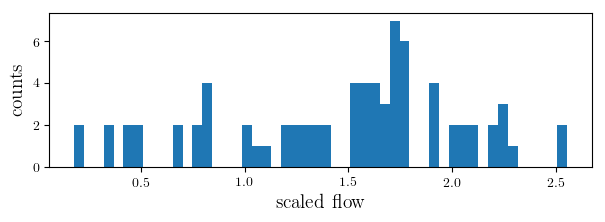

In [8]:
using PyPlot

#################
#  Create Data  #
#################
x = [tapFlowVecDict["$N"][i] / link_capac_vec[i] for i = 1:length(link_capac_vec)] # Values
nbins = 50 # Number of bins

##########
#  Plot  #
##########
# fig = figure("pyplot_histogram",figsize=(6,3)) # Not strictly required

fig = figure(figsize=(7, 2))

ax = axes() # Not strictly required
h = plt[:hist](x,nbins) # Histogram

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

# grid("on")
xlabel("scaled flow", fontdict=font1)
ylabel("counts", fontdict=font1)

savefig("./results/scaled_flow_histogram_Sioux_$(gamma1)_$(gamma2).pdf")

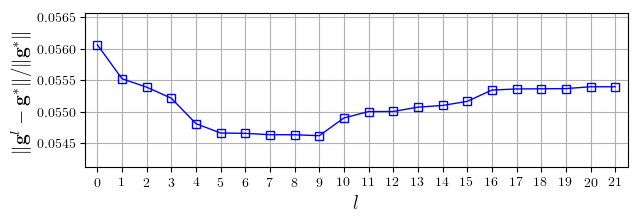

In [9]:
iterNum = 0:(N)

demandsDiff = map(iterNum->demandsDiffDict["$iterNum"], iterNum + 1)

# plot(iterNum, objFun, "s-g", label="True")

fig = figure(figsize=(7, 2))

plot(iterNum, demandsDiff, "s-b", linewidth=1, 
markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(-0.5, N + .5)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

xticks(0:N)

xlabel(L"l", fontdict=font1)
ylabel(L"$\|\textbf{g}^l - \textbf{g}^*\| / \| \textbf{g}^* \|$", fontdict=font1)

savefig("./results/demandsDiff_biLev_Sioux_$(gamma1)_$(gamma2).pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"Joint_problem_and_multi_class_Traffic/imag/"

savefig(dire * "demandsDiff_biLev_Sioux_$(gamma1)_$(gamma2).pdf", dpi=300, bbox_inches="tight")

In [10]:
normObjInvVIDict = Dict{}()

for key in keys(objInvVIDict)
    normObjInvVIDict[key] = objInvVIDict[key] / objInvVIDict["1"]
end

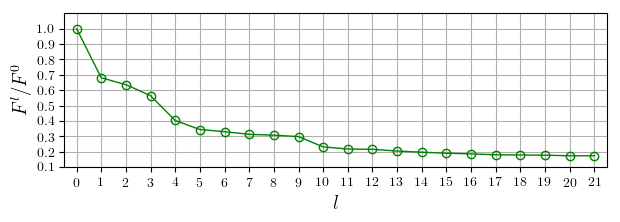

In [11]:
iterNum = 0:(N)

objFunBiLev = map(iterNum->norObjFunDict["$iterNum"], iterNum + 1)

# plot(iterNum, objFun, "s-g", label="True")

fig = figure(figsize=(7, 2))

plot(iterNum, objFunBiLev, "o-g", label="BiLev", linewidth=1, 
markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)

# objFunInv = map(iterNum->normObjInvVIDict["$iterNum"], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

# plot(iterNum, objFunInv, "s-r", label="InvVI", linewidth=1, 
# markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

# legend(loc="upper right",fancybox="true", frameon=false) 

grid("on")

xlim(-0.5, N + .5)
ylim(.1, 1.1)

xticks(0:N)
yticks(0.1:0.1:1.0)

xlabel(L"$l$", fontdict=font1)
ylabel(L"$F^{l}/F^0$", fontdict=font1)

savefig("./results/objFun_Sioux_$(gamma1)_$(gamma2).pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"Joint_problem_and_multi_class_Traffic/imag/"

savefig(dire * "objFun_Sioux_$(gamma1)_$(gamma2).pdf", dpi=300, bbox_inches="tight")

In [12]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)]);

In [13]:
keys(coeffs_dict)

Base.KeyIterator for a Dict{String,Any} with 22 entries. Keys:
  "(6,3.5,1.0,5)"
  "(6,3.5,1.0,2)"
  "(6,3.5,1.0,21)"
  "(6,3.5,1.0,19)"
  "(6,3.5,1.0,17)"
  "(6,3.5,1.0,6)"
  "(6,3.5,1.0,18)"
  "(6,3.5,1.0,11)"
  "(6,3.5,1.0,15)"
  "(6,3.5,1.0,16)"
  "(6,3.5,1.0,8)"
  "(6,3.5,1.0,13)"
  "(6,3.5,1.0,7)"
  "(6,3.5,1.0,20)"
  "(6,3.5,1.0,10)"
  "(6,3.5,1.0,4)"
  "(6,3.5,1.0,1)"
  "(6,3.5,1.0,3)"
  "(6,3.5,1.0,22)"
  "(6,3.5,1.0,12)"
  "(6,3.5,1.0,9)"
  "(6,3.5,1.0,14)"

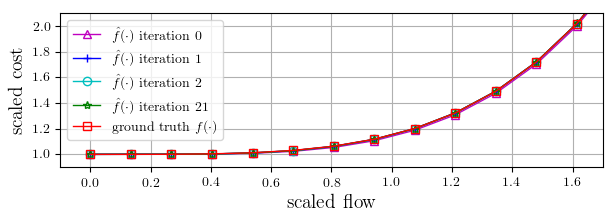

In [14]:
iterN_1 = 1
iterN_2 = 2
iterN_3 = 3
iterN_4 = N

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["(6,3.5,1.0,$iterN_1)"]
est_coeffs_2 = coeffs_dict["(6,3.5,1.0,$iterN_2)"]
est_coeffs_3 = coeffs_dict["(6,3.5,1.0,$iterN_3)"]
est_coeffs_4 = coeffs_dict["(6,3.5,1.0,$iterN_4)"]

xs = linspace(0, max_scaled_flow, 20)
xs_true = linspace(0, max_scaled_flow, 20)

zs_true = map(x->polyEval(true_coeffs, x), xs_true)

zs_1 = map(x->polyEval(est_coeffs_1, x), xs)
zs_2 = map(x->polyEval(est_coeffs_2, x), xs)
zs_3 = map(x->polyEval(est_coeffs_3, x), xs)
zs_4 = map(x->polyEval(est_coeffs_4, x), xs)

fig = figure(figsize=(7,2))

plot(xs, zs_1, "^-m", label=L"$\hat f(\cdot)$ iteration 0", linewidth=1, 
markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)

plot(xs, zs_2, "+-b", label=L"$\hat f(\cdot)$ iteration 1", linewidth=1, 
markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

plot(xs, zs_3, "o-c", label=L"$\hat f(\cdot)$ iteration 2", linewidth=1, 
markerfacecolor="None", markeredgecolor="c", markeredgewidth=1)

plot(xs, zs_4, "*-g", label=L"$\hat f(\cdot)$ iteration" * " $(N)", linewidth=1, 
markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)

plot(xs_true, zs_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=1, 
markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

legend(loc="upper left",fancybox="true", frameon=true) 

grid("on")
# xlim(-0.1, max_scaled_flow+0.1);
xlim(-0.1, 1.7);
ylim(0.9, 2.1);

xticks(0:0.2:1.6)
yticks(1:0.2:2)

xlabel("scaled flow", fontdict=font1)
ylabel("scaled cost", fontdict=font1)

savefig("./results/fitting_Sioux_$(gamma1)_$(gamma2).pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"Joint_problem_and_multi_class_Traffic/imag/"

savefig(dire * "fitting_Sioux_$(gamma1)_$(gamma2).pdf", dpi=300, bbox_inches="tight")

In [15]:
norObjFunDict

Dict{String,Any} with 22 entries:
  "4"  => 0.564348
  "1"  => 1.0
  "12" => 0.217888
  "20" => 0.177916
  "2"  => 0.680624
  "6"  => 0.344652
  "22" => 0.174241
  "11" => 0.231972
  "13" => 0.216307
  "5"  => 0.403301
  "15" => 0.197353
  "16" => 0.190828
  "14" => 0.204918
  "21" => 0.174241
  "7"  => 0.330612
  "8"  => 0.313475
  "17" => 0.186215
  "10" => 0.298771
  "19" => 0.179309
  "18" => 0.180609
  "9"  => 0.307892
  "3"  => 0.636088

In [16]:
1 - norObjFunDict["$(N+1)"]

0.8257588147916953